# Unsupervised Learning

Training on an un-labeled dataset using k-means  



In [1]:
# import dependencies and data from scikit-learn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
X, _ = make_blobs()  # we make the blobs without the provided cluster IDs.
                          # We're predicting the IDs of the clusers here
                          # therefore, we'll only be using X going forward, and
                          # the second returned variable '_' will be discarded

#### The X array contains blobs of data without labels
You don't have to run this as part of the program, it is merely showing the data structure

In [3]:
for byte in X:
  print(byte)

[ 3.91201569 -3.91873064]
[-1.13709329  4.93497983]
[-1.47837558  4.86317142]
[0.25598335 4.77577712]
[ 4.1002637  -3.71701076]
[-0.01735902  5.40982391]
[-1.6589309   4.20280452]
[-9.39505783  7.66805183]
[ 3.26812555 -2.25599695]
[-1.27555455  3.14006956]
[-0.84092192  3.19487964]
[-2.84631951  6.12453329]
[-1.57939332  3.77519081]
[-0.78825033  4.26237725]
[-8.90798386  9.44720257]
[ 2.51733016 -5.50813362]
[-10.01655983   8.50592125]
[-1.33590021  3.54985288]
[ 4.89094678 -3.57977222]
[ 3.61823953 -4.20649267]
[-11.13094177   9.63907985]
[-9.19406144  8.00363587]
[-10.53004489   8.42941371]
[-2.64803832  5.20155329]
[ 3.83727712 -4.02011829]
[ 2.10256816 -4.01464562]
[ 1.38864064 -3.29639766]
[ 3.43902578 -6.25142489]
[ 3.61794056 -3.17769789]
[-0.41268786  6.08756323]
[-10.64334888   7.26804484]
[ 5.59061263 -5.05599214]
[-1.62363152  3.74413099]
[-0.72692524  3.49092899]
[ 4.33312932 -4.19325526]
[0.52739932 3.82327342]
[-1.28549636  4.12569019]
[-8.40878874  9.76131487]
[ 4.7605


### K-Means Clustering  
We set the number of clusters 'k' to 5 because we anticipate there being 5 centroids in the example data.

n_init is the number of times the k-means algorithm is run with different centroid
seeds.  

random_state set to 42 per the hitchhiker's guide to the universe


In [4]:
from numpy.random.mtrand import random
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
y_predictions = kmeans.fit_predict(X)

### Predictions
Each instance is assigned to one of the 5 clusters.
Each instance's label is the index of the cluster to which the algo assigns the instance. (These are the indexes)  
Not to be confused as with class labels in classification


In [5]:
print(y_predictions)

[4 2 2 2 4 2 2 1 4 2 2 2 2 2 3 0 3 2 4 4 3 1 3 2 4 4 4 0 4 2 1 0 2 2 4 2 2
 3 0 3 2 0 2 3 3 2 2 2 1 0 0 0 3 2 3 4 0 3 4 1 1 1 2 3 2 2 3 2 0 3 2 0 2 2
 3 1 0 0 3 1 3 1 3 0 0 0 3 3 2 4 4 2 3 0 2 1 4 4 2 3]


The kmeans instance preserves the labels of the instances it was training on.

In [6]:
# demonstrate that these are of kmeans labels
y_predictions is kmeans.labels_

True

### View the 5 cluster centroids that the algo found
As you can see, we have coordinates to 5 centroids

In [7]:
kmeans.cluster_centers_

array([[ 3.49425187, -5.24413978],
       [-9.15624042,  7.94099577],
       [-1.09403263,  4.3201317 ],
       [-9.91794363,  9.41296087],
       [ 3.57561079, -3.62665917]])

### Assign new instances to a cluster


In [8]:
import numpy as np
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([2, 2, 2, 2], dtype=int32)

### Plotting the dataset, centroids, and decision boundaries  
As you can see, for each data cluster we assign a centroid, which is the mean location of the cluster. This is denoted by a larger circle.   
Between each cluster there is a line and that is the decision boundary.
You can see that some datapoints of oblong clusters seem to be mislabeled. This is due to the kmeans algo using the distance to centroid in labeling.  



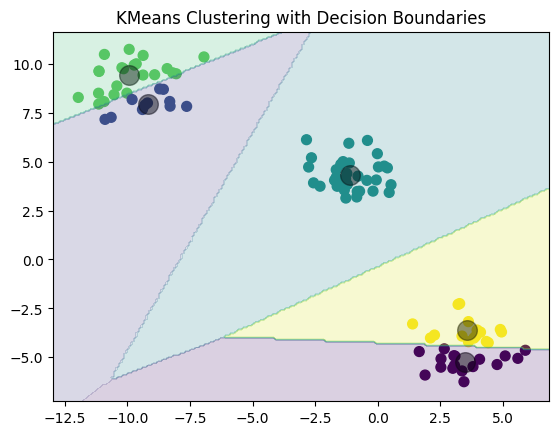

In [11]:
import matplotlib.pyplot as plt


# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_predictions, s=50, cmap='viridis')

# Plotting the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict cluster for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')

plt.title("KMeans Clustering with Decision Boundaries")
plt.show()